<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

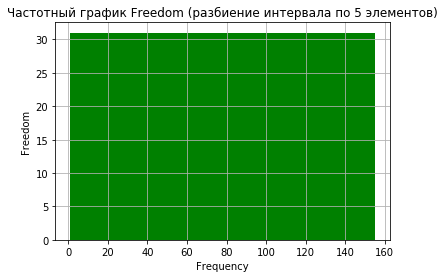

In [6]:
# Freedom: Сводоба, в данном стоблце показана степень, в которой свобода способствовала вычислению показателя счастья.
n, bins, patches = plt.hist(df['Freedom'], 5, facecolor='g')

plt.xlabel('Frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 5 элементов)')
plt.grid(True)
plt.show()

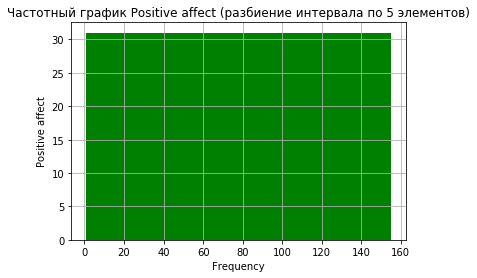

In [7]:
# Positive affect: Положительный эффект, мера положительных эмоций.
n, bins, patches = plt.hist(df['Positive affect'], 5, facecolor='g')

plt.xlabel('Frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 5 элементов)')
plt.grid(True)
plt.show()

Freedom и Positive affect имеют непрерывное равномерное распределение, потому что плотность вероятности на интервалах постоянна, то есть каждое значение встречается с равной вероятностью.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [8]:
freedom = df['Freedom']
# Найдем выбросы в данной колонке, и уберем нулевые значения, чтобы все метрики дальше считались корректно
print('Нулевых строк: ', freedom.isnull().sum())
print('Было строк: ', freedom.shape)
freedom = freedom.dropna()
print('Стало строк: ',freedom.shape)

Нулевых строк:  1
Было строк:  (156,)
Стало строк:  (155,)


In [10]:
mediana_fr = statistics.median(freedom)
print(f'Медиана: {mediana_fr}')
mean_fr = statistics.mean(freedom)
print(f'Математическое ожидание: {mean_fr}')
pstdev_fr = statistics.pstdev(freedom)
print(f'Стандартное отклонение: {pstdev_fr}')
pvariance_fr = statistics.pvariance(freedom)
print(f'Дисперсия: {pvariance_fr}')
min_fr = min(freedom)
print(f'Минимум: {min_fr}')
max_fr = max(freedom)
print(f'Максимум: {max_fr}')
fr_range = max_fr - min_fr
print(f'Размах: {fr_range}')

Медиана: 78.0
Математическое ожидание: 78.0
Стандартное отклонение: 44.74371464239419
Дисперсия: 2002.0
Минимум: 1.0
Максимум: 155.0
Размах: 154.0


In [11]:
mode_fr = statistics.mode(freedom)
print(f'Мода {mode_fr}')

StatisticsError: no unique mode; found 155 equally common values

###### Почему нельзя найти моду?

Ответ: потому что в столбце Freedom нет значения, которое появляется чаще всего. Ниже проверим, что в таблице 155 уникальных значений.

In [12]:
print(freedom.unique())
print('Всего строк в столбце Freedom: ',len(freedom))
print('Уникальных значений в столбце Freedom: ',freedom.nunique())

[  5.   6.   3.   7.  19.  11.  10.   8.   9.  26.  17.  16.  93.  28.
  63.  33.  44.  53.  62.  58.   4.  12.  71.  69. 102.  98.  25.  68.
  95.  32.  84.  30.  20.  74. 132.  24. 108.  51.  52.   1. 122.  56.
  13.  70.  50.  54.  57.  81.  42.  47.  18. 126. 144.  45.  49.  40.
  64.  39.  80.  35. 138.  34.  77.  61.  37. 114. 107.  15. 124. 128.
  79. 139.  86. 118.  66.  43. 137. 140.  36. 131. 150. 112. 105.  75.
  38.  83. 149.  76. 101. 136.  48.  31.  23.  59.  90. 115.  91. 100.
  67.  88. 103.  92. 119.  22.  85.  87. 145.   2. 134. 121.  14.  82.
 111. 127. 123. 117. 109. 104.  89.  72. 151.  46. 143.  27. 130. 125.
 110. 116.  55.  29. 142. 141. 106. 113.  99. 129.  73. 120.  41.  94.
 148. 146.  97. 135.  96. 152.  60. 153.  65. 147.  21.  78. 155. 133.
 154.]
Всего строк в столбце Freedom:  155
Уникальных значений в столбце Freedom:  155


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [13]:
# Сначала уберем выбросы - нулевые значения из столбцов
freedom = df['Freedom']
print('Нулевых строк в столбце Freedom: ', freedom.isnull().sum())
positive_affect = df['Positive affect']
print('Нулевых строк в столбце Positive affect: ', positive_affect.isnull().sum())
freedom = freedom.dropna()
positive_affect = positive_affect.dropna()

Нулевых строк в столбце Freedom:  1
Нулевых строк в столбце Positive affect:  1


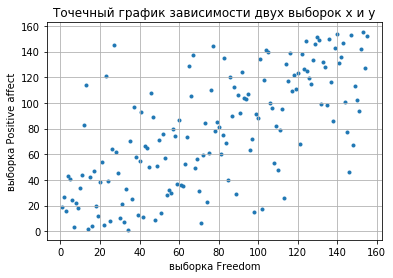

In [14]:
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

По графику видно, что чем больше свободы у граждан, тем больше у них позитивных эмоций.

In [15]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_affect)
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.6817698430601657


Ответ: Коэффициент корреляции Пирсона равен 0,7, это означает, что между показателем свобода и показателем позитивный эффект - достаточно сильная положительная взаимосвязь. Математический расчет коэффициента подтвердил графическую интерпритацию корреляции.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [16]:
# из каждого элемента столбца вычитаем среднее значение по столбцу (можно разделить на дисперцию)
# freedom_1 = (freedom - mean_fr) / pvariance_fr можно так, чтобы данные были небольшого масштаба
freedom_1 = freedom - mean_fr #централизация
print(max(freedom_1))
print(min(freedom_1))

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1)) #масштабирование

print(min(freedom_2))
print(max(freedom_2))

77.0
-77.0
[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

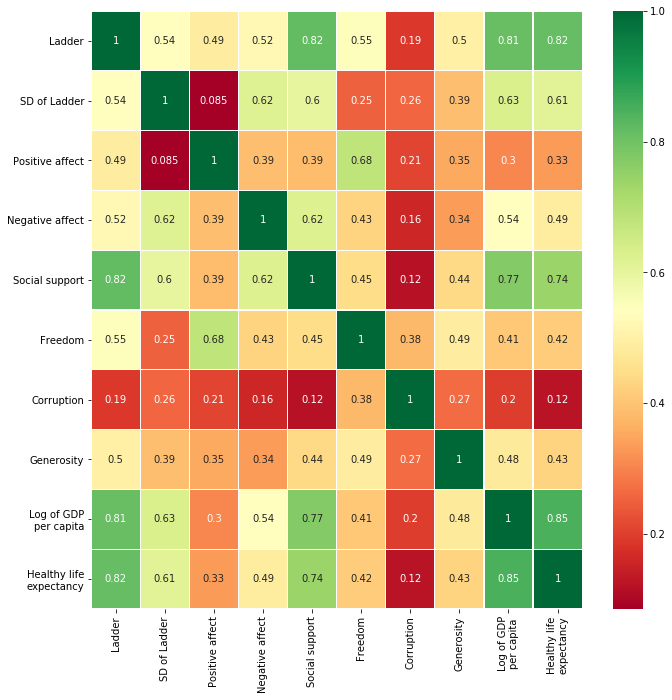

In [17]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(11,11)
plt.show()

Загрузить таблицу цен на авокадо: 

In [18]:
df_avocado=pd.read_csv('avocado.csv')
print(df_avocado.shape)
df_avocado[:3]

(18249, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

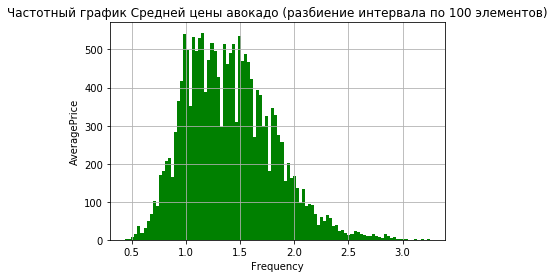

In [19]:
# Freedom: Сводоба, в данном стоблце показана степень, в которой свобода способствовала вычислению показателя счастья.
n, bins, patches = plt.hist(df_avocado['AveragePrice'], 100, facecolor='g')

plt.xlabel('Frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график Средней цены авокадо (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Распеределение средней цены на авокадо - нормальное, со смещением влево.

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [20]:
average_price = df_avocado['AveragePrice']
size_4046 = df_avocado['4046'] # количество купленых маленьких авокадо
size_4225 = df_avocado['4225'] # кол-во купленых больших авокадо
size_4770 = df_avocado['4770'] # кол-во купленыз очень больших авокадо

corr1, p_value = pearsonr(size_4046, average_price)
corr2, p_value = pearsonr(size_4225, average_price)
corr3, p_value = pearsonr(size_4770, average_price)

Коэффициент корреляции Пирсона 4046 и Average Price: -0.2083170484878848


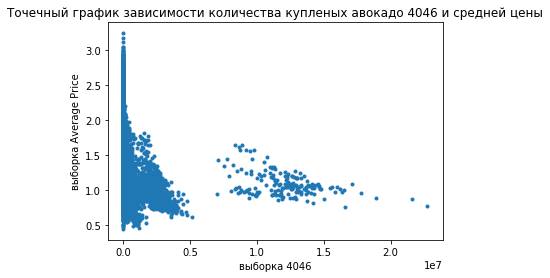

In [21]:
plt.xlabel('выборка 4046')
plt.ylabel('выборка Average Price')
plt.title('Точечный график зависимости количества купленых авокадо 4046 и средней цены')
plt.scatter(size_4046, average_price, marker='.')
print('Коэффициент корреляции Пирсона 4046 и Average Price:', corr1)

Коэффициент корреляции Пирсона 4225 и Average Price: -0.1729277725093354


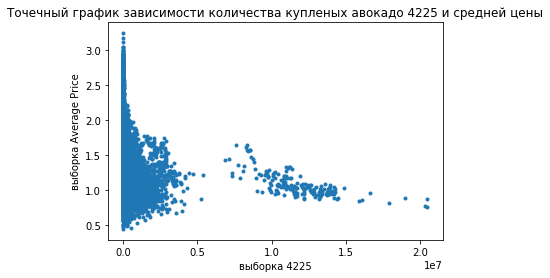

In [22]:
plt.xlabel('выборка 4225')
plt.ylabel('выборка Average Price')
plt.title('Точечный график зависимости количества купленых авокадо 4225 и средней цены')
plt.scatter(size_4225, average_price, marker='.')
print('Коэффициент корреляции Пирсона 4225 и Average Price:', corr2)

Коэффициент корреляции Пирсона 4770 и Average Price: -0.17944598397975622


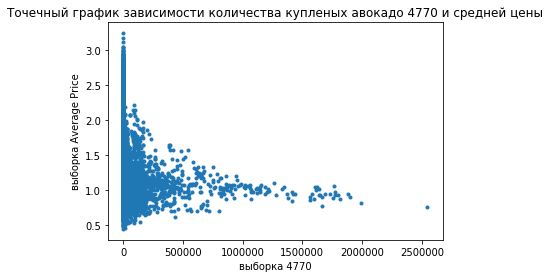

In [23]:
plt.xlabel('выборка 4770')
plt.ylabel('выборка Average Price')
plt.title('Точечный график зависимости количества купленых авокадо 4770 и средней цены')
plt.scatter(size_4770, average_price, marker='.')
print('Коэффициент корреляции Пирсона 4770 и Average Price:', corr3)

Вывод: коэффициент корреляции Пирсона во всех 3-х зависимостях равен примерно -0,2.
Это значит, что между количеством купленых авокадо разного размеры, и их средней ценой есть небольшая обратная зависимость, то есть чем выше средняя цена, тем меньше авокадо покупают вне зависимости от размера.